In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
from numpy import *
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

from sklearn.metrics import mean_squared_error

In [8]:
data=pd.read_csv('2020-6-1.csv')
#data=pd.read_csv('boston_house_prices.csv')
x=data.loc[:,data.columns!='Fs']
#y即为读取后的结果
y=data.loc[:,'Fs']

#models=[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8733333333333333, gamma=0, importance_type='gain', learning_rate=0.3242105263157895, max_delta_step=0, max_depth=5, min_child_weight=1, missing=None, n_estimators=104, n_jobs=1, nthread=None, objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=0.8578947368421053, verbosity=1)]
models=[XGBRegressor(objective ='reg:squarederror')]
#models=[GradientBoostingRegressor(n_estimators=10000, max_depth=5, min_samples_split=3,learning_rate=0.001,loss='ls')]
models_str=['XGBoost']

scale_x=StandardScaler()
x1=scale_x.fit_transform(x)
scale_y=StandardScaler()

score_0=[]
mse_0=[]


data = pd.DataFrame()

# ser = pd.Series(yHat.tolist())
# ser =ser.diff()
# ser[0]=0
# list_best = [5,14,22,36,46,58]
# yHat = lwlrTest(xArr, xArr, yArr,0.5)

for number in range(1,10):

    x_train1,x_test1,y_train1,y_test1 = train_test_split(x, y,test_size = 0.3,random_state = number)
    # x_train2,x_test2,y_train2,y_test2 = train_test_split(x, ser,test_size = 0.3,random_state = number)
    # x_train3,x_test3,y_train3,y_test3 = train_test_split(x1,yHat,test_size = 0.3,random_state = number)

    for name,model in zip(models_str,models):
                #print('开始训练模型：'+name)
        model=model   #建立模型 
        model.fit(x_train1,y_train1)
        y_pred=model.predict(x_test1)
                #print(name +' 得分1:'+str(score))
    
        mse0=mean_squared_error(y_test1, y_pred)
        print(number,mse0)

1 0.006385797472368992
2 0.0040506836554182885
3 0.006007790320959522
4 0.006428440999040973
5 0.0049639345099788245
6 0.0044652727403212
7 0.004999051798437289
8 0.00760747808993362
9 0.005971728612771792


In [213]:
## 2 
## csdn上代码
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# 将最后损伤信号进行奇异值分解
# 
import numpy as np
import matplotlib.pyplot as plt


path = '评价标准/F_proposed.txt'  # 数据集路径

series = np.loadtxt(path)
#series = series - np.mean(series)   # 中心化(非必须)

# step1 嵌入
windowLen = 16             # 嵌入窗口长度
seriesLen = len(series)     # 序列长度
K = seriesLen - windowLen + 1
X = np.zeros((windowLen, K))
for i in range(K):
    X[:, i] = series[i:i + windowLen]

# step2: svd分解， U和sigma已经按升序排序
U, sigma, VT = np.linalg.svd(X, full_matrices=False)

for i in range(VT.shape[0]):
    VT[i, :] *= sigma[i]
A = VT

# 重组
rec = np.zeros((windowLen, seriesLen))
for i in range(windowLen):
    for j in range(windowLen-1):
        for m in range(j+1):
            rec[i, j] += A[i, j-m] * U[m, i]
        rec[i, j] /= (j+1)
    for j in range(windowLen-1, seriesLen - windowLen + 1):
        for m in range(windowLen):
            rec[i, j] += A[i, j-m] * U[m, i]
        rec[i, j] /= windowLen
    for j in range(seriesLen - windowLen + 1, seriesLen):
        for m in range(j-seriesLen+windowLen, windowLen):
            rec[i, j] += A[i, j - m] * U[m, i]
        rec[i, j] /= (seriesLen - j)
        
Fs = np.sum(rec[0:3,:], axis=0)  # 选择重构的部分，这里选了全部

1 0.007941848725981235
2 0.0068874896917821855
3 0.00960457951628889
4 0.008139846573363165
5 0.007482705663104781
6 0.007909604409567384
7 0.007179890240519471
8 0.009675789834035064
9 0.008642499726993694
10 0.010152240823787488
11 0.009438863615390102
12 0.009748049829092416
13 0.008118248947414725
14 0.00689904625117492
15 0.007946664090883368
16 0.008777874319702063
17 0.0070324452854108955
18 0.009622894854608799
19 0.007478724134742801
20 0.005710557023094437
21 0.007841673937943015
22 0.008187636725273124
23 0.007730690641243834
24 0.010270009992755414
25 0.007827816790751367
26 0.006813155406513247
27 0.007572422951348457
28 0.00959458819125477
29 0.009758174644793593
30 0.009986263689118348
31 0.011377798629449242
32 0.007543360880850597
33 0.008083572549511598
34 0.009016501056822803
35 0.012911927652514145
36 0.00791489588839553
37 0.0075134370416357595
38 0.010970189551000764
39 0.007266135941380789
40 0.011327436131650446
41 0.00904270169554959
42 0.012198863939087402
43 

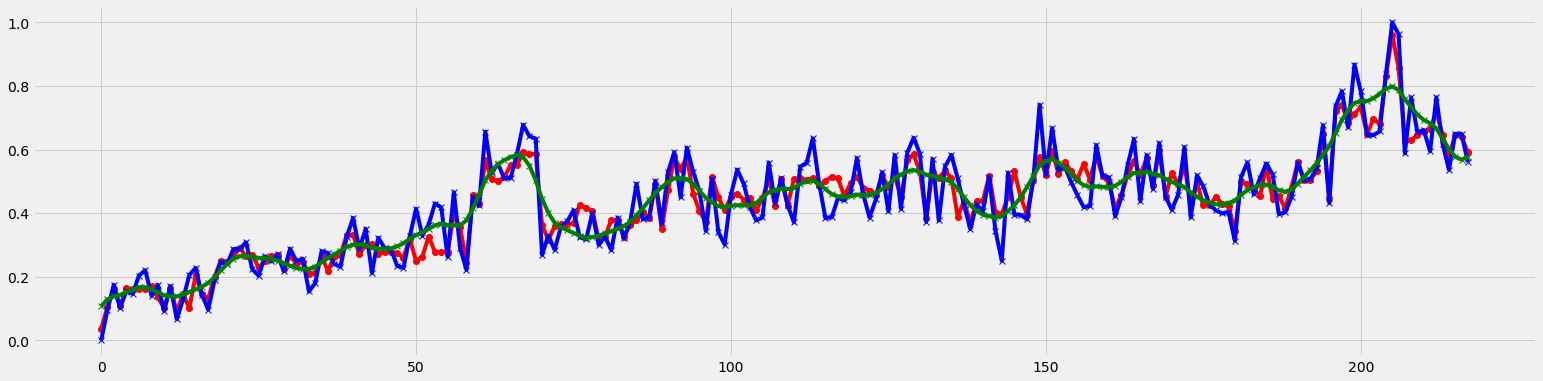

In [214]:
data=pd.read_csv('2020-6-1.csv')
#data=pd.read_csv('boston_house_prices.csv')
x=data.loc[:,data.columns!='Fs']
#y即为读取后的结果
yHat=series
y=Fs
#models=[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8733333333333333, gamma=0, importance_type='gain', learning_rate=0.3242105263157895, max_delta_step=0, max_depth=5, min_child_weight=1, missing=None, n_estimators=104, n_jobs=1, nthread=None, objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=0.8578947368421053, verbosity=1)]
models=[XGBRegressor(objective ='reg:squarederror')]
#models=[GradientBoostingRegressor(n_estimators=10000, max_depth=5, min_samples_split=3,learning_rate=0.001,loss='ls')]
models_str=['XGBoost']

scale_x=StandardScaler()
x1=scale_x.fit_transform(x)
scale_y=StandardScaler()

score_0=[]
mse_0=[]


data = pd.DataFrame()

# ser = pd.Series(yHat.tolist())
# ser =ser.diff()
# ser[0]=0
# list_best = [5,14,22,36,46,58]
# yHat = lwlrTest(xArr, xArr, yArr,0.5)

for number in range(1,100):

    x_train1,x_test1,y_train1,y_test1 = train_test_split(x1, y,test_size = 0.3,random_state = number)
    # x_train2,x_test2,y_train2,y_test2 = train_test_split(x, ser,test_size = 0.3,random_state = number)
    x_train3,x_test3,y_train3,y_test3 = train_test_split(x1,yHat,test_size = 0.3,random_state = number)

    for name,model in zip(models_str,models):
                #print('开始训练模型：'+name)
        model=model   #建立模型 
        model.fit(x_train1,y_train3)
        y_pred=model.predict(x_test1)
                #print(name +' 得分1:'+str(score))
    
        mse0=mean_squared_error(y_test3, y_pred)
        print(number,mse0)
        
plt.figure(figsize=(24, 6))

plt.plot(model.predict(x1),c = 'r', marker = 'o') #blue 红色为预测值
plt.plot(series.tolist(),c = 'b', marker = 'x') #blue 蓝色为实际值 
plt.plot(Fs,c = 'g', marker = 'x') #blue  绿色为补偿值
plt.show()

### Fs
## 使用前6组奇异值合并结果
1 0.0036522093918770066
2 0.0022438920916876175
3 0.0022430347532007913
4 0.0030264224895622735
5 0.002289624259138103
6 0.0027191475638802614
7 0.0021296025810370474
8 0.003930523663166089
9 0.002283261223141723
## 使用前5组奇异值合并结果
1 0.0027819922878498577
2 0.0016874519339175127
3 0.0015510633717307604
4 0.0021470216661432216
5 0.0017474714067634148
6 0.0019938178313185445
7 0.001660589653590422
8 0.0030194383458860678
9 0.0016172285979623253
# Fad
## 前六
1 0.0025010639899201766
2 0.0015453720820271504
3 0.002393517737787098
4 0.0033261198579773985
5 0.0027160178960999636
6 0.0031436794252662275
7 0.002575025545553213
8 0.0029893089437503483
9 0.001484870623948332
## 前5
1 0.0024082676190902205
2 0.0012868663415941044
3 0.0018150292188994848
4 0.002094037053554438
5 0.0013810628840014967
6 0.002648690476661561
7 0.0014707022116123396
8 0.0027862579542459456
9 0.001530324813474786
# Fd
## 前5
1 0.002816792226390104
2 0.0023032265401153012
3 0.002677999270517573
4 0.0035742952400908243
5 0.003237285268728218
6 0.0024818260597705725
7 0.0034169679761176528
8 0.003808244928352259
9 0.002304210594375818
## 前6
1 0.003702263702947637
2 0.003910722907778067
3 0.004187715236774383
4 0.004350118837233995
5 0.0043651906642652085
6 0.0032900600758763057
7 0.0038553546263713086
8 0.00450229931209229
9 0.0032445699638529936
# Fda
## 6
1 0.002725883687110772
2 0.0020365061179011337
3 0.0027694093054735523
4 0.003042663239519749
5 0.002590808105529249
6 0.002115367117792832
7 0.00256940246830191
8 0.003478062317648515
9 0.0019665659712755873
## 5
1 0.002265048189011104
2 0.0013873793790472014
3 0.002123597293325671
4 0.0031076783320314314
5 0.0022753243231133707
6 0.001673299036926752
7 0.0023653257392838994
8 0.0032701483755307203
9 0.0016131836275517354
# Fed
## 5
1 0.0023992328654877096
2 0.001259662133222818
3 0.0018665269220431758
4 0.002150406896483983
5 0.001451528381197917
6 0.002562929448899716
7 0.001587469671531244
8 0.002674719757663318
9 0.0016644244713152178
## 6
1 0.0024475157496532743
2 0.0015076350445003574
3 0.0023596549127408986
4 0.0032430286505658584
5 0.002542321146845407
6 0.003158094515688082
7 0.0026422217525233042
8 0.0029566908187352906
9 0.0016057418163536816

In [215]:
## ARIMA
data = sm.datasets.co2.load_pandas()
y = data.data
# The 'MS' string groups the data in buckets by start of the month
y = y['co2']
# The term bfill means that we use the value before filling in missing values
#y = y.fillna(y.bfill())
print(y)
type(y)

1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Freq: W-SAT, Name: co2, Length: 2284, dtype: float64


pandas.core.series.Series

In [216]:
data1 =pd.read_csv('forarima.csv')
print(data1)
data1['Fs'] = date

         data
0    1900/1/1
1    1900/1/2
2    1900/1/3
3    1900/1/4
4    1900/1/5
..        ...
213  1900/8/1
214  1900/8/2
215  1900/8/3
216  1900/8/4
217  1900/8/5

[218 rows x 1 columns]


NameError: name 'date' is not defined

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)
p1 = d1 = q1 = range(0, 1)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
 
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p1, d1, q1))]
warnings.filterwarnings("ignore") # specify to ignore warning messages
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
 
            results = mod.fit()
 
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [399]:
## 2 
## csdn上代码
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# 将最后损伤信号进行奇异值分解
# 
import numpy as np
import matplotlib.pyplot as plt


path = '评价标准/F_change.txt'  # 数据集路径

series = np.loadtxt(path)
#series = series - np.mean(series)   # 中心化(非必须)

# step1 嵌入
windowLen = 16             # 嵌入窗口长度
seriesLen = len(series)     # 序列长度
K = seriesLen - windowLen + 1
X = np.zeros((windowLen, K))
for i in range(K):
    X[:, i] = series[i:i + windowLen]

# step2: svd分解， U和sigma已经按升序排序
U, sigma, VT = np.linalg.svd(X, full_matrices=False)

for i in range(VT.shape[0]):
    VT[i, :] *= sigma[i]
A = VT

# 重组
rec = np.zeros((windowLen, seriesLen))
for i in range(windowLen):
    for j in range(windowLen-1):
        for m in range(j+1):
            rec[i, j] += A[i, j-m] * U[m, i]
        rec[i, j] /= (j+1)
    for j in range(windowLen-1, seriesLen - windowLen + 1):
        for m in range(windowLen):
            rec[i, j] += A[i, j-m] * U[m, i]
        rec[i, j] /= windowLen
    for j in range(seriesLen - windowLen + 1, seriesLen):
        for m in range(j-seriesLen+windowLen, windowLen):
            rec[i, j] += A[i, j - m] * U[m, i]
        rec[i, j] /= (seriesLen - j)
        
Fs = np.sum(rec[0:4,:], axis=0)  # 选择重构的部分，这里选了全部

325 0.0006271524482341485


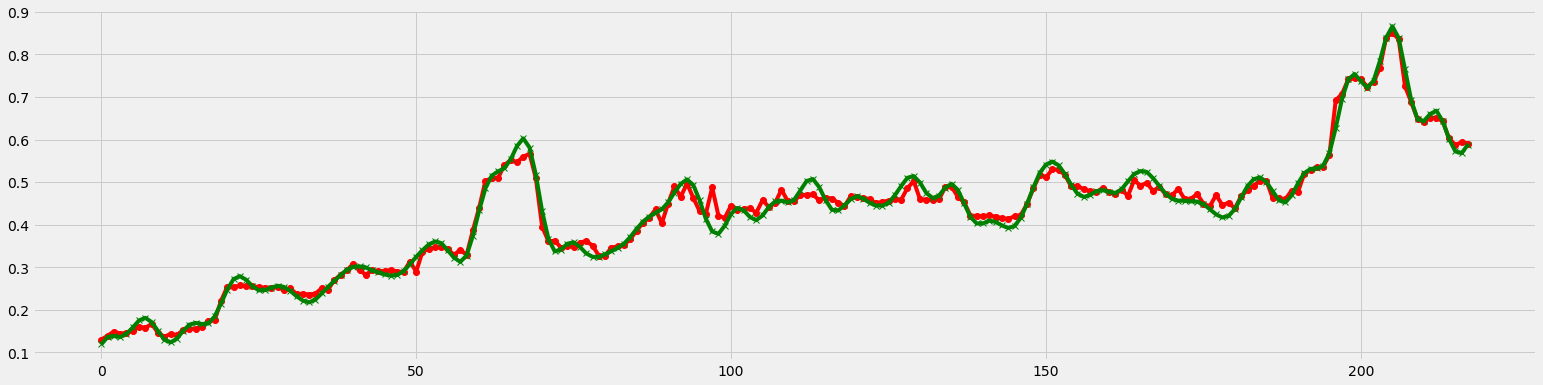

In [400]:
data=pd.read_csv('2020-6-1.csv')
#data=pd.read_csv('boston_house_prices.csv')
x=data.loc[:,data.columns!='Fs']
#y即为读取后的结果
yHat=series
y=Fs
#models=[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8733333333333333, gamma=0, importance_type='gain', learning_rate=0.3242105263157895, max_delta_step=0, max_depth=5, min_child_weight=1, missing=None, n_estimators=104, n_jobs=1, nthread=None, objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=0.8578947368421053, verbosity=1)]
models=[XGBRegressor(objective ='reg:squarederror')]
#models=[GradientBoostingRegressor(n_estimators=10000, max_depth=5, min_samples_split=3,learning_rate=0.001,loss='ls')]
models_str=['XGBoost']

scale_x=StandardScaler()
x1=scale_x.fit_transform(x)
scale_y=StandardScaler()

score_0=[]
mse_0=[]


data = pd.DataFrame()

# ser = pd.Series(yHat.tolist())
# ser =ser.diff()
# ser[0]=0
# list_best = [5,14,22,36,46,58]
# yHat = lwlrTest(xArr, xArr, yArr,0.5)

for number in range(325,326):

    x_train1,x_test1,y_train1,y_test1 = train_test_split(x1, y,test_size = 0.3,random_state = number)
    # x_train2,x_test2,y_train2,y_test2 = train_test_split(x, ser,test_size = 0.3,random_state = number)
    x_train3,x_test3,y_train3,y_test3 = train_test_split(x1,yHat,test_size = 0.3,random_state = number)

    for name,model in zip(models_str,models):
                #print('开始训练模型：'+name)
        model=model   #建立模型 
        model.fit(x_train1,y_train1)
        y_pred=model.predict(x_test1)
                #print(name +' 得分1:'+str(score))
        mse1=mean_squared_error(y_test1, y_pred)
        mse0=mean_squared_error(y_test3, y_pred)
        #print(number,mse0)
        if mse1<0.0012:
            print(number,mse1)
plt.figure(figsize=(24, 6))

plt.plot(model.predict(x1),c = 'r', marker = 'o') #blue 红色为预测值
#plt.plot(series.tolist(),c = 'b', marker = 'x') #blue 蓝色为实际值 
plt.plot(Fs,c = 'g', marker = 'x') #blue  绿色为补偿值
plt.show()

In [401]:
index = pd.date_range('3/3/2018',periods=218)
ts = pd.Series(model.predict(x1),index=index)
print(ts)

2018-03-03    0.129936
2018-03-04    0.139107
2018-03-05    0.148921
2018-03-06    0.143817
2018-03-07    0.145121
                ...   
2018-10-02    0.642566
2018-10-03    0.602453
2018-10-04    0.587278
2018-10-05    0.593616
2018-10-06    0.590583
Freq: D, Length: 218, dtype: float32


In [402]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 4)
p1 = d1 = q1 = range(0, 1)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
 
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p1, d1, q1))]
warnings.filterwarnings("ignore") # specify to ignore warning messages
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
 
            results = mod.fit()
 
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:268.7463836933905
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-11.600609720029158
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:-246.37450566912608
ARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:-396.2687065011549
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-989.8982695995221
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-990.9675814755208
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:-985.5755077023179
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:-978.4105771970801
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-886.5803040320175
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:-974.1793941703438
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:-974.7844310799242
ARIMA(0, 2, 3)x(0, 0, 0, 12)12 - AIC:-969.2213966188176
ARIMA(0, 3, 0)x(0, 0, 0, 12)12 - AIC:-656.7054139593299
ARIMA(0, 3, 1)x(0, 0, 0, 12)12 - AIC:-870.3044023950347
ARIMA(0, 3, 2)x(0, 0, 0, 12)12 - AIC:-950.7724363924829
ARIMA(0, 3, 3)x(0, 0, 0, 12)12 - AIC:-951.744275037799
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-993.7579838399572
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-994.580334

In [403]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(3, 1, 2),
                                seasonal_order=(0, 0, 0 , 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
 
results = mod.fit()
 
print(results.summary().tables[1]) #详细输出，results.summary()可以输出全部的模型计算参数表

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0543      0.089     11.849      0.000       0.880       1.229
ar.L2         -0.8909      0.121     -7.381      0.000      -1.128      -0.654
ar.L3          0.0357      0.078      0.455      0.649      -0.118       0.189
ma.L1         -1.0120      0.105     -9.639      0.000      -1.218      -0.806
ma.L2          1.1433      0.116      9.818      0.000       0.915       1.371
sigma2         0.0004    8.3e-05      4.929      0.000       0.000       0.001


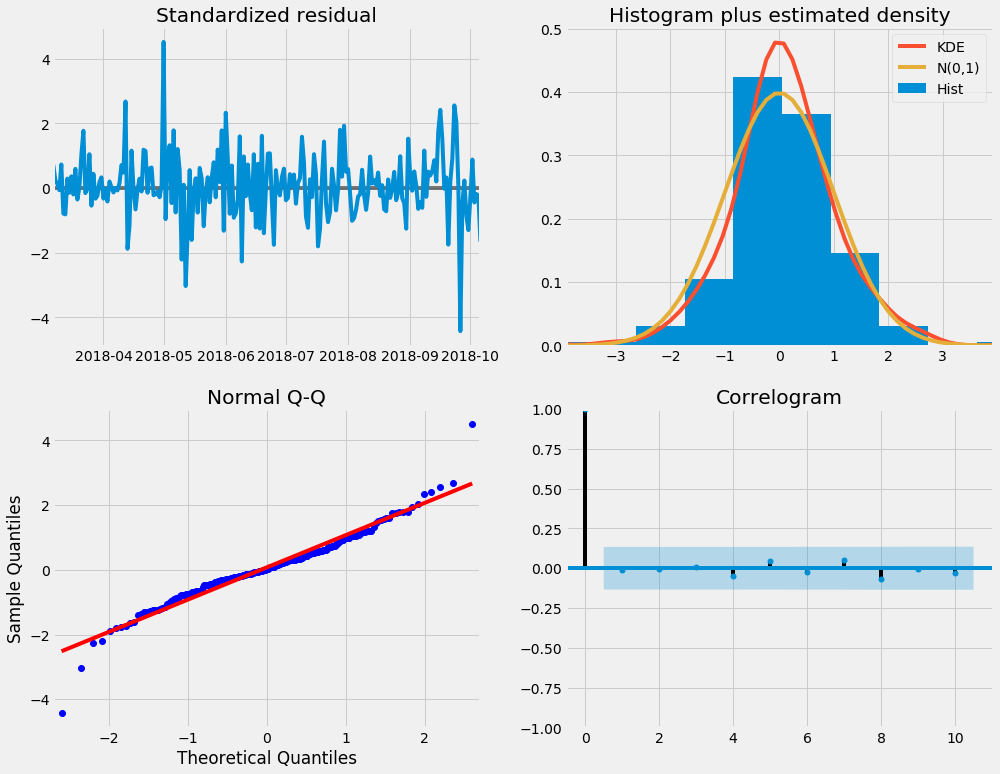

In [343]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [404]:
pred = results.get_prediction(start=pd.to_datetime('2018-03-20'), dynamic=False)#预测值
pred_ci = pred.conf_int(alpha=0.05)
print(pred_ci)

             lower y   upper y
2018-03-20  0.112016  0.204302
2018-03-21  0.132166  0.224451
2018-03-22  0.133811  0.225762
2018-03-23  0.184005  0.275708
2018-03-24  0.215932  0.307631
...              ...       ...
2018-10-02  0.605038  0.695686
2018-10-03  0.581706  0.672355
2018-10-04  0.537424  0.628072
2018-10-05  0.535879  0.626528
2018-10-06  0.560038  0.650686

[201 rows x 2 columns]


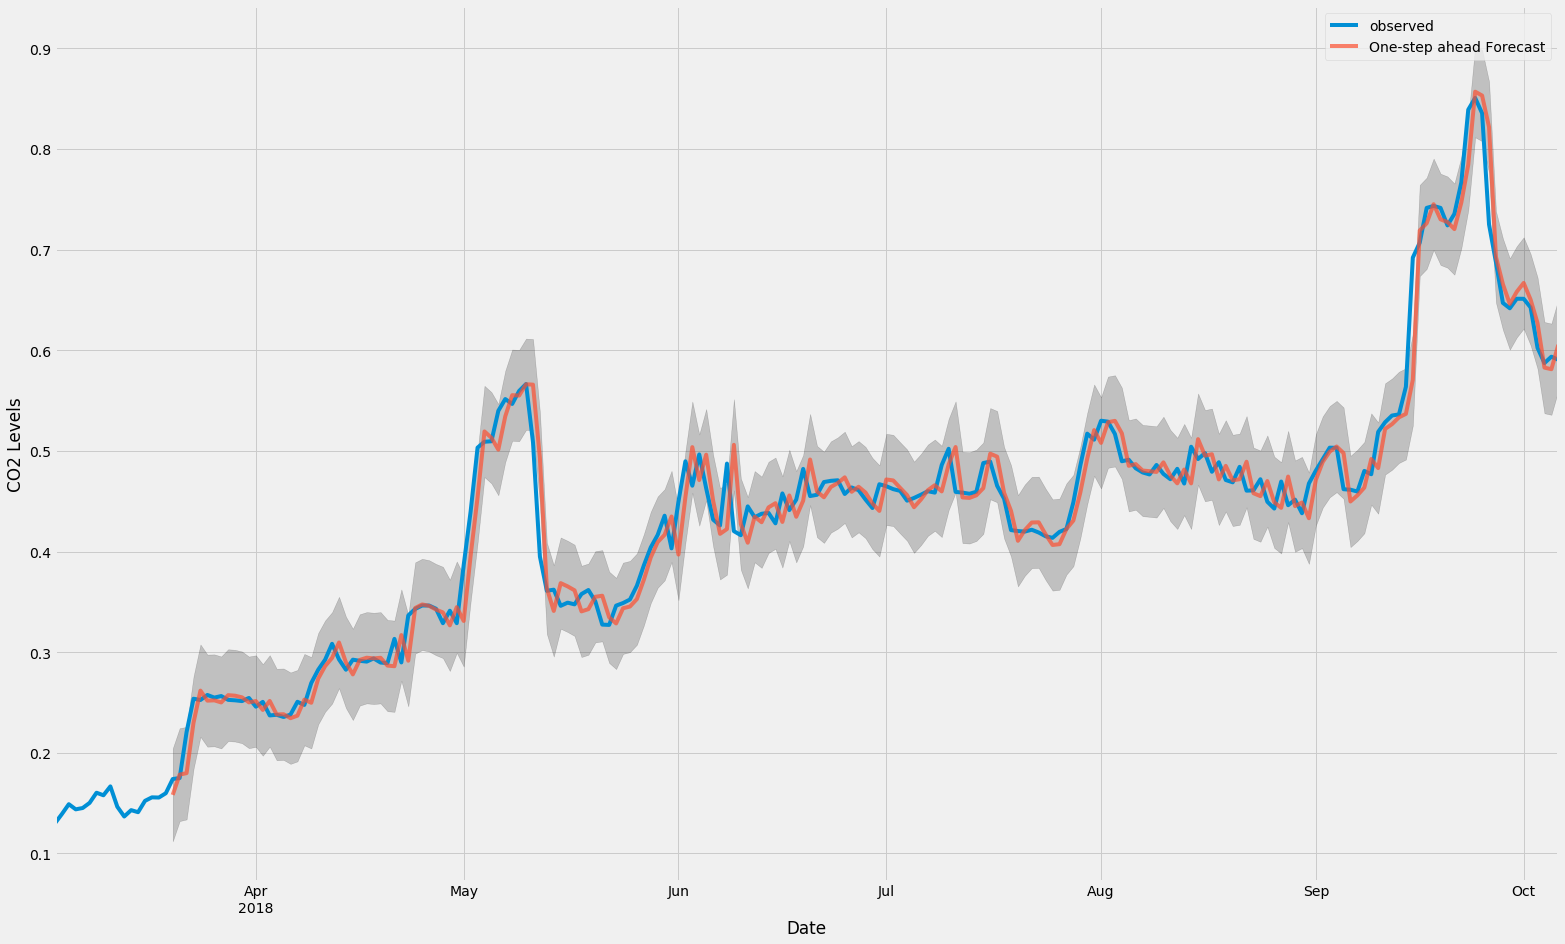

In [405]:
ax = ts['2018':].plot(label='observed',figsize=(24, 15))

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
#plt.plot(ts[index],series.tolist(),c = 'black', marker = 'x') #blue 蓝色为实际值 
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
#图形填充fill fill_between，参考网址：
#https://www.cnblogs.com/gengyi/p/9416845.html


ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')


plt.legend()
plt.show()

2018-03-03    0.00000
2018-03-04    0.09568
2018-03-05    0.17469
2018-03-06    0.10200
2018-03-07    0.15495
               ...   
2018-10-02    0.61706
2018-10-03    0.53655
2018-10-04    0.64938
2018-10-05    0.64958
2018-10-06    0.56043
Freq: D, Length: 218, dtype: float64


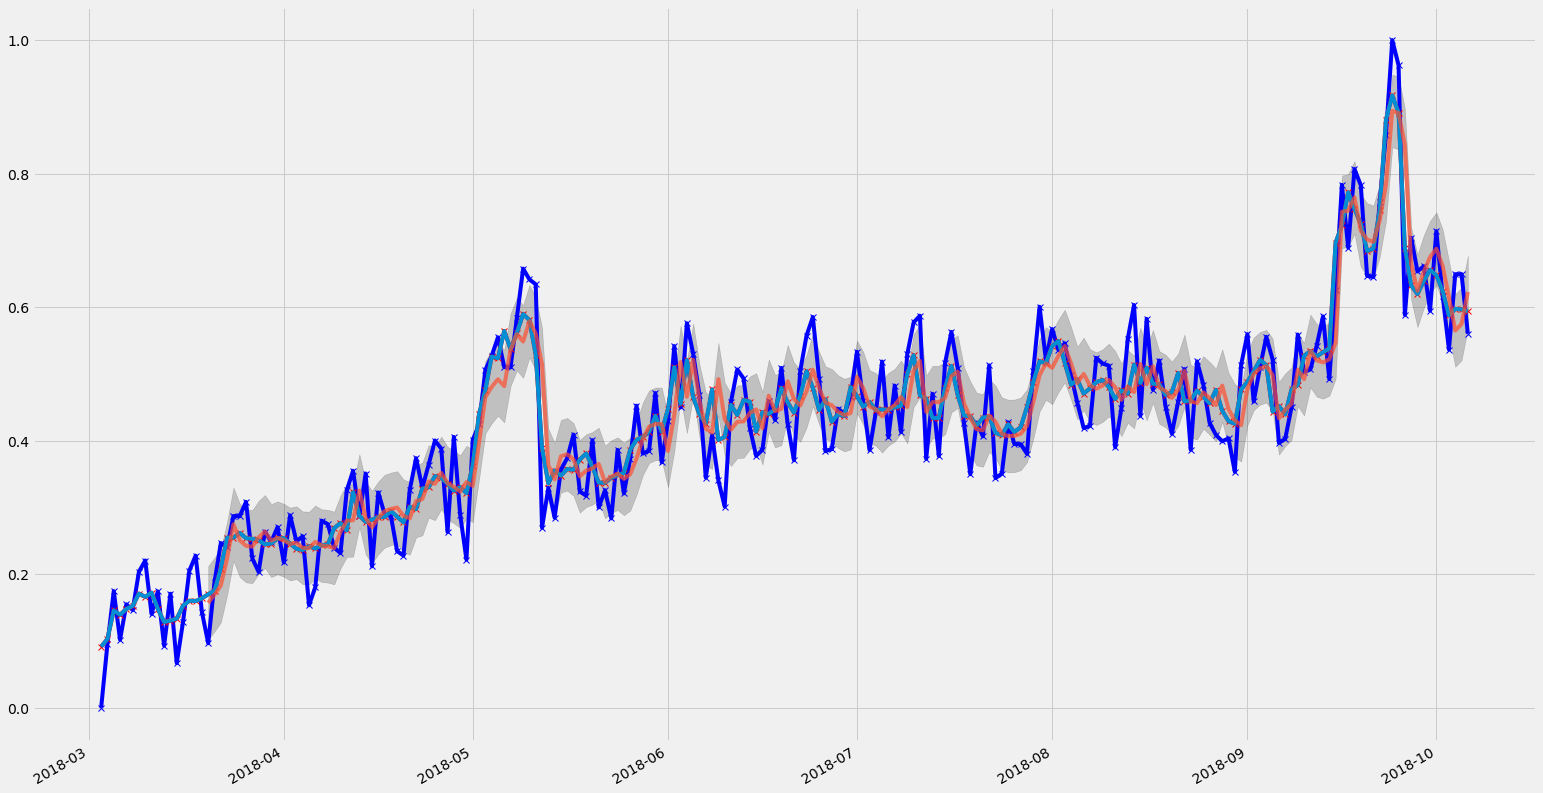

In [397]:
index = pd.date_range('3/3/2018',periods=218)
ts1 = pd.Series(series,index=index)
print(ts1)

plt.figure(figsize=(24, 6))
#plt.plot(pred_ci.index)
#plt.plot(model.predict(x1),c = 'r', marker = 'o') #blue 红色为预测值
plt.plot(ts1,c = 'b', marker = 'x') #blue 蓝色为实际值 
plt.plot(ts,c = 'r', marker = 'x') #blue 蓝色为实际值 


ax = ts['2018':].plot(label='observed',figsize=(24, 15))

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
#plt.plot(ts[index],series.tolist(),c = 'black', marker = 'x') #blue 蓝色为实际值 
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
#plt.plot(Fs,c = 'g', marker = 'x') #blue  绿色为补偿值
plt.show()

In [398]:
y_forecasted = pred.predicted_mean
y_truth = ts['2018-3-31':]
 
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))

The Mean Squared Error of our forecasts is 0.00103


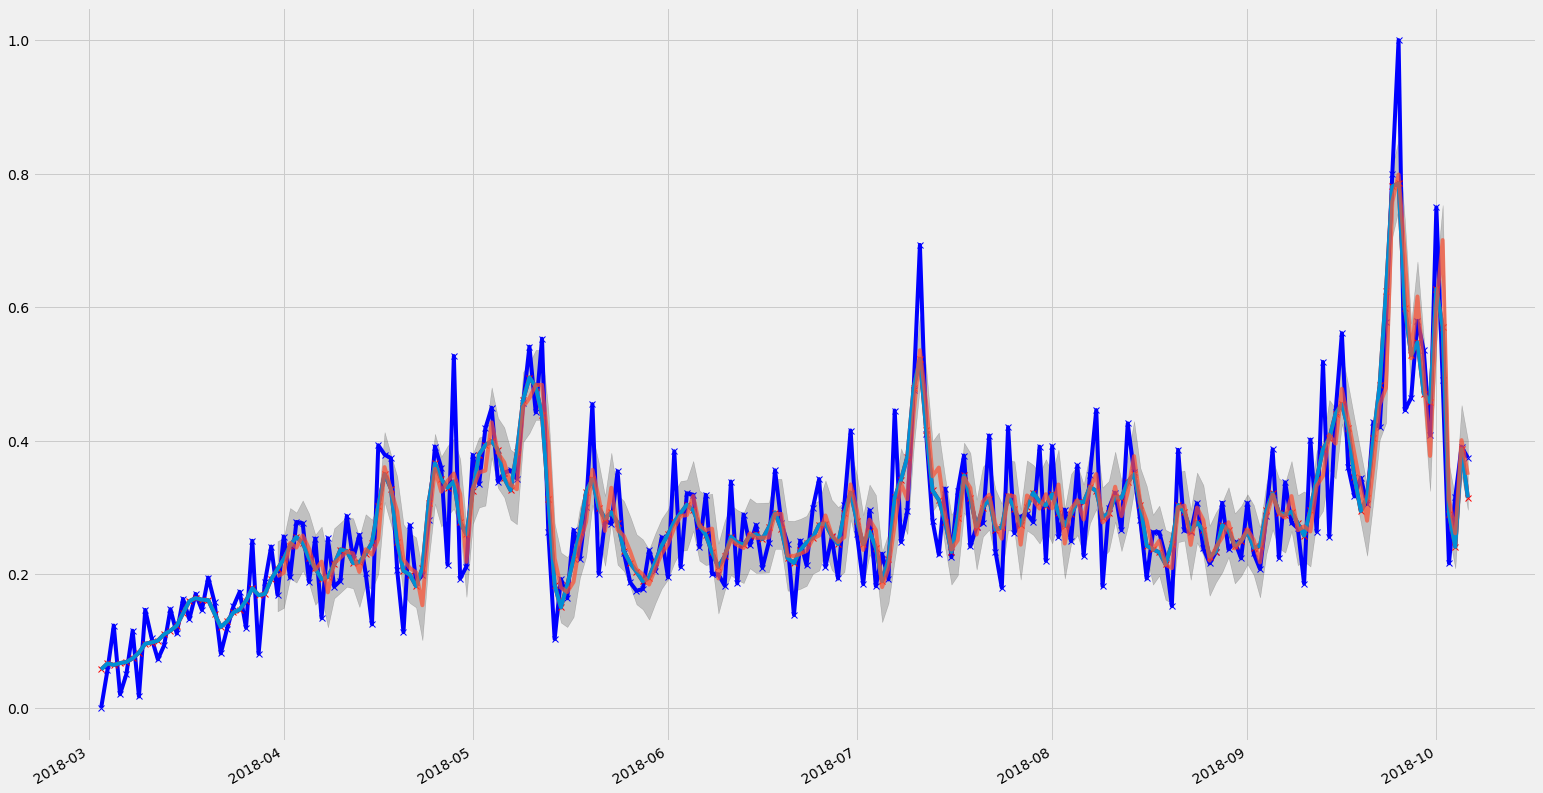

In [389]:
qqq = pred.predicted_mean